<span style='color:Blue'>  

 ### Sajedeh Aghababaei


You'll need these modules at minimum, so import them now and import more as you need them.

In [29]:
import pingouin as pg
import pandas as pd
import numpy as np
from numpy import random as rnd

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.formula.api as smf 
from statsmodels.formula.api import ols 

In [3]:
# This function is used to find and remove the outliers. 
# Outliers are here defined as the sample outside of the 1.5 IQRs of the lower and upper quartile.

def outlier_removal(dataframe,variable):
    data = dataframe[variable]
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = data.quantile(0.25) #lower quantile
    Q3 = data.quantile(0.75) #upper quantile

    # Calculate IQR
    IQR = Q3 - Q1

    # Define outlier bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers within data
    outliers = dataframe[(data < lower_bound) | (data > upper_bound)]

    return outliers

## Q1-3 Data Analyses

In this part you will run statistical analyses on 3 datasets in order to test the hypotheses stated in each case. 

For each dataset, you need to:
<br>
* Identify and state the dependent variable and the independent variable(s)
* Describe your plan for analysing the data, including any preliminary steps you will take, e.g. to test whether certain statistical test assumptions are met, and any post-hoc analyses that you plan to conduct as a follow-up (if applicable). State whether and how you intend to deal with outliers - how will you detect them and how "outlying" do they need to be for you to exclude them?
* Choose and state the statistical test you will use to address the hypothesis, and provide a motivation for why this test is appropriate - most importantly regarding the variable types and number of conditions, e.g. the t-test is appropriate when you have two groups and you want to compare a continuous variable
* Provide any summary statistics (means, medians, standard deviations, etc.) that you think are important for summarising the data, and well labeled visualizations (bar charts or scatter plots or histograms, etc) in order to convey the essential qualities of the data. Provide comments about the contents where it's important in justifying your analysis steps or interpretations.
* Conduct and interpret any preliminary analyses you planned to do
* Conduct and interpret the main analysis itself
* Conduct and interpret any planned post-hoc analyses you planned to do
* Summarise your findings and give the "take home message" (what do you conclude based on the data?)

Not every step will necessarily apply to each dataset. Part of your task will be to determine which steps are necessary in each context. Remember that in statistics there is not always one correct way of running an analysis - what matters here is that you demonstrate you've put some thought into your choices and provide a brief but clear justification.

We have provided a template layout to format your answer. Stick to this format so we can easily navigate your answer. Where we have a single cell for the plots and for the analysis in the template, of course you can use multiple cells as you see fit (e.g. a first one for importing the packages needed, then another for reading in the data, etc. etc.), with commentary in between to tell us what you're up to.

The task here is designed to assess your understanding of these statistical analyses and how to interpret them. When interpreting analyses, be specific. What specifically about the outcome of the test leads to your interpretation? Make sure to enter comments that demonstrate to us your understanding of what you're doing - do not leave it to us to guess your reasons behind the analysis choices. 

### Q1: traffic deaths and their causes

Car dimensions have been shifting in recent years, and a study is conducted to investigate whether and how that might be impacting the likelihood of killing a pedestrian when they are struck by a car. In the file CollisionOutcomes.xlsx you will find data from 34 traffic incidents, in which cars were driven into pedestrians on Dublin streets. The file indicates whether, in each case, the pedestrian died (1) or not (0), along with the height of the front hood of the vehicle that struck them.
<br>

Test this hypothesis: The probability of a struck pedestrian dying increases with the height of the car's front hood.

Give appropriate metrics to convey how accurately your statistical model can predict whether a struck pedestrian is killed or not.
Also estimate, from your statistical model, the odds ratio of a struck pedestrian dying vs surviving for a Range Rover with a hood height of 115 cm, compared to a Tesla with a hood height of 78 cm. 
<br>Are there other factors you think should be taken into account to interpret this accurately and fully understand the influence of Hood Height on fatalities?

#### Variables, analysis plan and motivation

<span style='color:Blue'> Set Up the Hypotheses:

- **Null Hypothesis (H0):** The probability of a pedestrian dying does not increase with the height of the car's front hood.  
- **Alternative Hypothesis (H1):** The probability of a pedestrian dying increases with the height of the car's front hood.

---

<span style='color:Blue'> Variables:

- **Independent Variable:** Hood Height (continuous)
- **Dependent Variable:** Death of Pedestrian (binary: 1 = died, 0 = survived)

---

<span style='color:Blue'> Plan:

- **Logistic Regression**  
  
---

<span style='color:Blue'> Reason for choosing this test:

1. Logistic Regression is appropriate because the outcome (death or survival) is binary (nominal), and hood height is a continuous predictor variable.
2. Logistic regression can estimate the **odds ratio**, which answers the hypothesis about how the likelihood of death increases with hood height.

---

<span style='color:Blue'> Preliminary Analyses:

1. **Check for missing values** 
2. **Brief description of the data statisitcs:** Check the overal mean, std, and  IQ1 and IQ3    
3. **Visualization:** Plot the hood height distribution to detect outliers. Also plot the logistic regression curve. This will help visualize how the height of the hood correlates with the likelihood of a fatality.
4. **remove outliers:** Hood height is continuous, so we should check for any extreme values or outliers. if a sample data is larger or lower than the 1.5 of first or third quantile, it is considered as an outilier. A function named 'outlier_removal' will find and remove them.

---

<span style='color:Blue'> Post-hoc:

1. From the logistic regression model, we can extract the coefficients for hood height and compute the **odds ratio**. 
2. Estimate the odds ratio of a pedestrian dying by a Range Rover vs Tesla. This will allow us to quantify how the odds of a fatality change with a difference in hood height between these two car models.

#### Summary Statistics and Graphs

In [3]:
# Step1: Load the dataset
df_fatal = pd.read_excel('CollisionOutcomes.xlsx')
df_fatal.head()

,Unnamed: 0,Height,fatal
0,0,71,0
1,1,72,1
2,2,88,0
3,3,101,0
4,4,137,1


In [4]:
#Step 2: Overall view of the dataset

# Check for missing values

print('checking for missing values:\n')
print(df_fatal.isnull().sum())

# Descriptive statistics
print('\nStatistics of the dataset:')
df_fatal.describe()

checking for missing values:

Unnamed: 0    0
Height        0
fatal         0
dtype: int64

Statistics of the dataset:


,Unnamed: 0,Height,fatal
count,34.000000,34.000000,34.000000
mean,16.500000,108.911765,0.500000
std,9.958246,29.516680,0.507519
min,0.000000,6.000000,0.000000
25%,8.250000,88.250000,0.000000
50%,16.500000,114.500000,0.500000
75%,24.750000,131.750000,1.000000
max,33.000000,149.000000,1.000000


<span style='color:Blue'> So based on the above, we know the data is filled completely and also by knowing the mean and std of the hoodhight, it is easier to detect outliers in the following section:

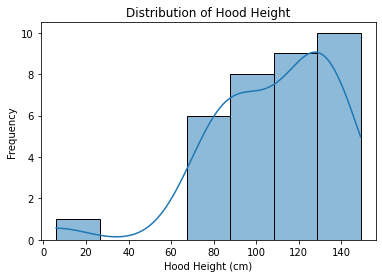

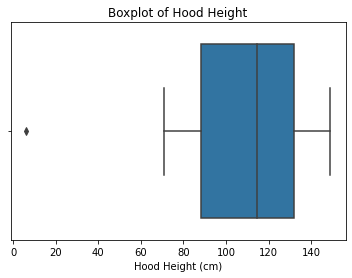

Detected outliers:


,Unnamed: 0,Height,fatal
8,8,6,1


In [5]:
#Step 3: Visualization

# Distribution of hood height
sns.histplot(df_fatal['Height'], kde=True)
plt.title('Distribution of Hood Height')
plt.xlabel('Hood Height (cm)')
plt.ylabel('Frequency')
plt.show()

# Boxplot for outlier detection
sns.boxplot(x=df_fatal['Height'])
plt.title('Boxplot of Hood Height')
plt.xlabel('Hood Height (cm)')
plt.show()

# Identify outliers using IQR: using the "remove_outliers", provide in the begining of the notebook
outliers = outlier_removal(df_fatal,'Height') 
#remove the indexes which were diagnosed as outliers
data_fatal_no_outliers = df_fatal.drop(outliers.index) 
print('Detected outliers:')
outliers

As we can see, there is a car with 6cm hoodhight, which is detected as the outlier. It is reasonable to remove it, as it doesn't mean rational anyway! :))

#### Analyses

<span style='color:Blue'> Here we will apply the logistic regresion analysis. First simply with pengouin handy function, to breifly get the coefficient and plot the scatter plot along side the logestic regression of the data:

In [6]:
#Step 4: Define dependent and independent variables
X = data_fatal_no_outliers['Height']  # Independent variable
y = data_fatal_no_outliers['fatal']   # Dependent variable

lrm = pg.logistic_regression(X=X, y=y)
lrm

,names,coef,se,z,pval,CI[2.5%],CI[97.5%]
0,Intercept,-5.676433,2.233945,-2.54099,0.011054,-10.054884,-1.297981
1,Height,0.049728,0.019246,2.58377,0.009773,0.012006,0.087450


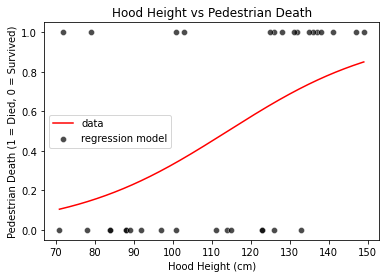

In [7]:
# Step 5: Logestic Regression plot

# Scatter plot of Hood Height vs Death Outcome
sns.scatterplot(x='Height', y='fatal', data=data_fatal_no_outliers, color="k", alpha=0.7)
plt.title('Hood Height vs Pedestrian Death')
plt.xlabel('Hood Height (cm)')
plt.ylabel('Pedestrian Death (1 = Died, 0 = Survived)')

# Plot the fit
params = lrm['coef'].values
b0 = params[0]
b1 = params[1]

# First create an array of x values over which we want to plot the logistic function - makes sense to extend from the lowest to the highest temperature value
x_range = np.linspace(np.min(X),np.max(X),1000)
regression = 1.0 / (1.0 + np.exp(-(b1*x_range + b0)))
plt.plot(x_range,regression,'r')
plt.legend(['data','regression model'])
plt.show()

In [89]:
#Step 6: Fit the logistic regression model

# Add constant to the model
X = sm.add_constant(X)
smlogmod = sm.Logit(y, X).fit()
print(smlogmod.summary())

Optimization terminated successfully.
         Current function value: 0.563123
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                  fatal   No. Observations:                   33
Model:                          Logit   Df Residuals:                       31
Method:                           MLE   Df Model:                            1
Date:                Thu, 28 Nov 2024   Pseudo R-squ.:                  0.1870
Time:                        20:06:31   Log-Likelihood:                -18.583
converged:                       True   LL-Null:                       -22.859
Covariance Type:            nonrobust   LLR p-value:                  0.003453
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.6767      2.234     -2.541      0.011     -10.055      -1.298
Height         0.0497      0.

#### From the results of the Logistic Regression, we have the following key information:

<span style='color:Blue'> ## Pseudo R-squared (0.1870): This is a measure of the goodness of fit. A value of 0.187 suggests the model explains about 18.7% of the variance in the data.

<span style='color:Blue'> ## LLR p-value (0.003453): 
    The likelihood ratio (LLR) p-value is used to assess the overall significance of the model. Since it is below 0.05, we reject the null hypothesis that the model does not explain the data, indicating that the model is statistically significant.

<span style='color:Blue'> ## Coefficients and significance: Intercept (const): -5.6767, which is the log-odds of the baseline group (when Height is 0).Height (0.0497): The coefficient for hood height is positive and significant (p-value = 0.010), indicating that as hood height increases, the log-odds of a pedestrian fatality increase.



In [90]:
#Step 7: Calculate odds ratio
odds_ratio = np.exp(smlogmod.params['Height'])
print(f"Odds Ratio for Hood Height: {odds_ratio}")

Odds Ratio for Hood Height: 1.0509872979547832


<span style='color:Blue'> The above odds ratio for hood height means that for each 1 cm increase in the height of the car's front hood, the odds of a pedestrian dying in a collision increase by approximately 5.1%.

In [96]:
#Step 8: Prediction

#Predict probabilities for specific hood heights
range_rover_height = 115
tesla_height = 78

# Add constant for logistic regression
range_rover_prob = smlogmod.predict([1, range_rover_height])[0]
tesla_prob = smlogmod.predict([1, tesla_height])[0]

# Calculate odds ratio
odds_range_rover = range_rover_prob / (1 - range_rover_prob)
odds_tesla = tesla_prob / (1 - tesla_prob)
odds_ratio_comparison = odds_range_rover / odds_tesla

print('Range Rover Probability: ',round(range_rover_prob,3))
print('Tesla Probability: ',round(tesla_prob,3))
print('Odds Ratio (Range Rover vs Tesla): ', round(odds_ratio_comparison,3))

Range Rover Probability:  0.511
Tesla Probability:  0.142
Odds Ratio (Range Rover vs Tesla):  6.297


#### Interpretation and Conclusion


<span style='color:Blue'> **Take home message:**
    
<span style='color:Blue'> **1.Statistical Significance:** The model is statistically significant (p-value = 0.003453), indicating that the relationship between hood height and pedestrian fatalities is not due to random chance.

<span style='color:Blue'> **2. odd ratio:** The above odds ratio for hood height means that for each 1 cm increase in the height of the car's front hood, the odds of a pedestrian dying in a collision increase by approximately 5.1%.

<span style='color:Blue'> **3. Model Performance:** The logistic regression model provides a reasonable fit to the data, explaining around 18.7% of the variance in the likelihood of pedestrian fatalities. While this is not a very high explanatory power (indicating other factors also influence the outcome), the model is significant enough to highlight the role of hood height in fatalities.

<span style='color:Blue'> **4. Other Factors:** While hood height is a significant factor, other variables, such as the speed of the vehicle, type of vehicle (SUV vs. sedan), and pedestrian characteristics (age, health) should also be considered for a more comprehensive understanding of pedestrian safety. Future models could incorporate these additional factors to improve predictions and inform better safety measures.

### Q2: Rehabilitation with an ExoSkeleton

In the file ExoRehab.xlsx you will find clinical assessment data of 45 stroke patients. All of these patients have undergone physical therapy rehabilitation over the course of a 6 month period, and a rehabilitation engineering researcher has asked for 15 of them to undergo additional treatment with an exoskeleton walking aid ("Ex1") which has been on the market for 5 years, and for another 15 of them to undergo additional treatment with a new, smarter Exoskeleton ("Ex2") that models individual gait through muscle synergy analysis. Clinical assessments are conducted both before and after the 6-month period, and these assessments are done by qualified clinicians who are independent from the study and have not seen what treatment the patients will get or have gotten. Their assessment takes into account multiple factors such as walking speed, consistency and balance, and produces an overall score out of 100, the greater the better. The data include the clinical assessment "ScoreBefore" (at the start of the 6 months) and "ScoreAfter" (at the end of the 6 months), the group assignment ("noEx," "Ex1," "Ex2"), and for extra information, a record of how many hours of rehabilitation in total, each subject has undergone. The researcher wants to know whether either one of the exoskeletons causes an improvement in this walking performance score relative to patients who have undergone regular rehabilitation regimes without any exoskeleton, and also whether either Exoskeleton is better than the other. 

Test these questions, starting with the general hypothesis that the level of improvement across the 3 groups is not the same. Clearly show and justify how you have derived a single dependent variable form the data and formed a complete statistical model/test. Once you have finished your full analysis, you may explore how the outcome and conclusions may have been different had you carried out the analysis differently, as long as you clearly label it as "post-analysis exploration" for educational purposes.<br> 
With reference to 'blinding,' from the description above, can you say that this study will be fully unbiased, or only partially so, and where might biases still occur?

#### Variables, analysis plan and motivation

### Variables, Analysis Plan, and Motivation

---

<span style='color:Blue'> **Set Up the Hypotheses:**

1. **General Hypothesis:**
   - **Null Hypothesis (H₀):** The level of improvement in walking performance scores is the same across the three groups (noEx, Ex1, Ex2).  
   - **Alternative Hypothesis (H₁):** At least one of the groups (noEx, Ex1, Ex2) shows a different level of improvement in walking performance scores.

---

<span style='color:Blue'> **Variables:**

- **Dependent Variable:** Define a new parameter called **Improvement** which is: `ScoreAfter - ScoreBefore`
- **Independent Variable:** Treatment Group (categorical: `noEx`, `Ex1`, `Ex2`).
- **Covariate:** Total hours of rehabilitation (`TotalRehabHrs`) to control for any differences in rehabilitation exposure across subjects.

---

<span style='color:Blue'> **Plan:**

- Conduct a t-test to compare scores before and after the rehabilation sessions, regardless of method of treatment.
- Conduct paired t-test for each of the conditions to test with-in improvement in each treatment type.
- Conduct One-Way ANOVA to compare improvement between the groups (Exo) based on the "improvement" score.
- Conduct ANCOVA to adjust for "TotalRehabHrs" as a covariate, to account for varying rehabilitation times between participants.
- Conduct Linear Regression to test for significant interaction effects between RehabHours and Group:
    > the regression will be modeled first with 1 factor of treatment type (Exo), then 2 factor (Exo and TotalRehabHrs) and then adding their interaction as well

---

<span style='color:Blue'> **Reason for Choosing These Tests:**

1. **t test** is appropriate as we want to compare two set of scores (before/after), which has continuous type.
2. **One-Way ANOVA** is appropriate because:
   - The independent variable (group assignment) has three categories.
   - The dependent variable (improvement score) is continuous.
3. **ANCOVA** is appropriate to control for the potential confounding effect of total rehabilitation hours on improvement scores.
4. **Linear Regression** to test the effect of different parameters and also their interaction. The final model can also help us in estimation the outcome of unseen data.  

---

<span style='color:Blue'> **Preliminary Analyses:**
    
1. **Descriptive Statistics:** Calculate mean, standard deviation, median, IQR, and range for `Improvement` within each group.
2. **Outlier Detection:** Use the IQR method to detect and remove outliers for `ScoreBefore`, `ScoreAfter`, and `Improvement`.
3. **Assumption Checks:**
   - **Normality:** Shapiro-Wilk test and/or Q-Q plots for each group.
   - **Homogeneity of Variance:** Levene’s test for equality of variances across groups.
4. **Data Visualization:** Boxplots and histograms to support exploratory understanding of group differences.

---

<span style='color:Blue'> **Post-hoc and Interpretation:**

1. If t-test and One-Way ANOVA are Significant, I will perform post-hoc tests to identify specific pairwise group differences (e.g., noEx vs. Ex1, noEx vs. Ex2, Ex1 vs. Ex2).

2. **If ANCOVA is Used:**
   - Report how rehabilitation hours influence improvement scores and whether the group differences remain significant after adjusting for this covariate.

---

<span style='color:Blue'> **Blinding and Bias:**

1. The clinical assessment process is blinded, as the clinicians do not know the group assignments of the patients. This reduces potential bias during the evaluation.
2. However, the study is only **partially blinded**, as the patients themselves know their treatment assignments, which could introduce placebo effects or behavioral changes (e.g., higher motivation in Ex1 or Ex2 groups).
3. Bias may also arise from:
   - Differences in adherence to the therapy protocol across groups.
   - Unequal distribution of confounding factors (e.g., severity of initial condition, rehab hours).

---

<span style='color:Blue'> **Post-Analysis Exploration:**

1. Compare results with a non-parametric test (e.g., Kruskal-Wallis) to explore robustness against violations of ANOVA assumptions.
2. Evaluate potential interactions between rehabilitation hours and group assignment (e.g., is Ex2 more effective for patients with higher rehab hours?).
3. Investigate if other baseline variables (e.g., initial assessment score) influence the results.

In [4]:
#Step : Load the dataset
df_rehab = pd.read_excel('ExoRehab.xlsx')

# Create a new column for the improvement score
df_rehab['Improvement'] = df_rehab['ScoreAfter'] - df_rehab['ScoreBefore']

# Check the newly created 'Improvement' column
df_rehab.head()

,Exo,ScoreBefore,ScoreAfter,TotalRehabHrs,Improvement
0,noEx,15.3,43.4,128.2,28.1
1,noEx,17.1,33.7,62.7,16.6
2,noEx,17.6,27.4,89.7,9.8
3,noEx,23.8,51.7,120.7,27.9
4,noEx,27.4,40.4,90.9,13.0


#### Summary Statistics and Graphs

In [5]:
#Step 2: Over view of the dataset

# Generate summary statistics for each group (Exo) for the 'ScoreBefore' and 'ScoreAfter' columns

grouped_summary_stats = df_rehab.groupby('Exo')[['ScoreBefore', 'ScoreAfter']].agg(['mean', 'std', 'min', 'max'])
grouped_summary_stats = grouped_summary_stats.round(2)
grouped_summary_stats


ScoreBefore                   ScoreAfter                  
            mean   std   min   max       mean   std   min   max
Exo                                                            
Ex1        18.54  5.19   7.4  28.0      50.77  8.93  36.1  72.4
Ex2        19.49  4.71   8.1  28.0      60.73  8.14  39.8  72.2
noEx       19.71  3.51  14.7  27.4      42.21  6.92  27.4  51.7

<span style='color:Blue'> These statistical parameters can give us a brief overview of scores before and after treatment

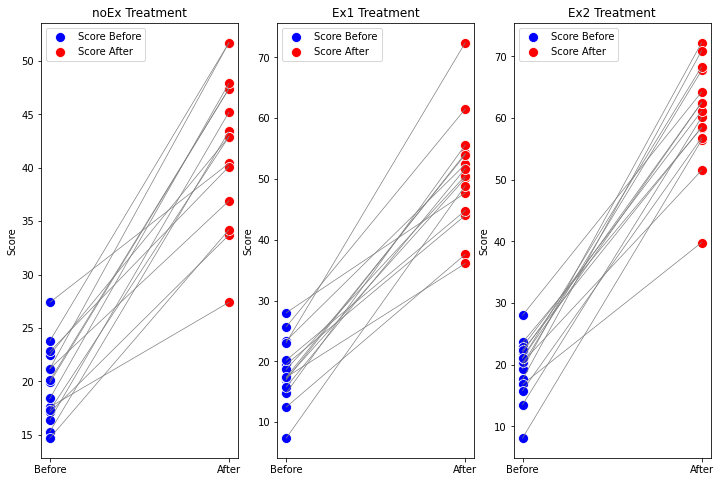

In [6]:
#Step 3.1: Visualization

# plot the scatterplot of before and after score for each of the groups >> show casing paired ttest

groups = df_rehab['Exo'].unique()
plt.figure(figsize=(12, 8))

# Create subplots: one for each group 
for i, group in enumerate(groups, 1):
    
    plt.subplot(1, len(groups), i)
    
    # Filter the data for the current group
    group_data = df_rehab[df_rehab['Exo'] == group]
    
    # Plot 'ScoreBefore' and 'ScoreAfter' as separate scatter points on the same plot
    sns.scatterplot(x=[0] * group_data.shape[0], y=group_data['ScoreBefore'], s=100, marker='o', label='Score Before', color='blue')
    sns.scatterplot(x=[1] * group_data.shape[0], y=group_data['ScoreAfter'], s=100, marker='o', label='Score After', color='red')
    
    # Connect the points with lines from 'ScoreBefore' to 'ScoreAfter' 
    for j in range(group_data.shape[0]):
        plt.plot([0, 1], [group_data['ScoreBefore'].iloc[j], group_data['ScoreAfter'].iloc[j]], color='gray', linestyle='-', linewidth=0.7)

    plt.title(f'{group} Treatment')
    plt.xticks([0, 1], ['Before', 'After'])  # Label the x-axis as 'Before' and 'After'
    plt.ylabel('Score')
    plt.legend()

plt.show()


<span style='color:Blue'> Comparing before-after scores visually, we can observe noticable improvement in all 3 rehabilation groups. However, we want to test it more specifically

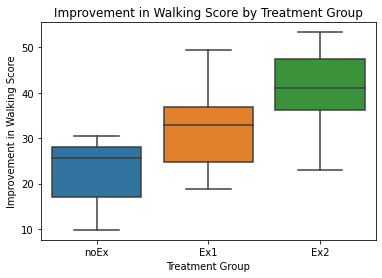

In [7]:
#Step 3.2: Visualization
# Plotting each group improvment 

sns.boxplot(x='Exo', y='Improvement', data=df_rehab)
plt.title('Improvement in Walking Score by Treatment Group')
plt.xlabel('Treatment Group')
plt.ylabel('Improvement in Walking Score')
plt.show()


<span style='color:Blue'> the bar plots shows more clear, probably significant, difference among 3 groups. So we need to explore it more:

<span style='color:Blue'> 

#### Analyses

In [8]:
# This function will check the normality and homoscedasticity of the data distribution and print out the result

from scipy.stats import shapiro

def distribution_test(data, DV, IV): #DV: Dependent Variable / #IV:Independent Variable
    
    alpha_level = 0.05
    
    # Shapiro-Wilk test for normality checking
    dv = data[DV]
    stat, p_normality = shapiro(dv)
    
    # Levene's test for homoscedasticity checking
    levene = pg.homoscedasticity(data, dv=DV, group=IV, method = 'levene')
    p_homoscedasticity = np.array(levene['pval'])
    
    if p_normality > alpha_level:
        print("Data is likely normally distributed")
    else:
        print("Data is likely not normally distributed")
    
    if p_homoscedasticity > alpha_level:
        print("Data is likely to have equal variance for all groups")
    else:
        print("Data is likely to  don't have equal variance for all groups")
    
    
    return p_normality, p_homoscedasticity

In [9]:
#Step 4: Assumption Checks for t-test and ANOVA

print('Checking scores before rehabilation:')
[p_normality, p_homoscedasticity]= distribution_test(df_rehab,'ScoreBefore','Exo')
print('Shapiro-Wilk Test: ', p_normality, ' and the homoscedasticity p-value=',  p_homoscedasticity)

print('\nChecking scores after rehabilation:')
[p_normality, p_homoscedasticity]= distribution_test(df_rehab,'ScoreAfter','Exo')
print('Shapiro-Wilk Test: ', p_normality, ' and the homoscedasticity p-value=',  p_homoscedasticity)

Checking scores before rehabilation:
Data is likely normally distributed
Data is likely to have equal variance for all groups
Shapiro-Wilk Test:  0.32904013991355896  and the homoscedasticity p-value= [0.69876579]

Checking scores after rehabilation:
Data is likely normally distributed
Data is likely to have equal variance for all groups
Shapiro-Wilk Test:  0.8496323227882385  and the homoscedasticity p-value= [0.9012366]


<span style='color:Blue'> 

In [13]:
#Step 5: Perform paired t-test to compare ScoreBefore vs ScoreAfter over all rehabilitation methods
#group_data = df_rehab[df_rehab['Exo']
result = pg.ttest(df_rehab['ScoreBefore'], df_rehab['ScoreAfter'], paired=True)
result

C:\Users\sajede\anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:6832: RuntimeWarning: invalid value encountered in _nct_sf
  return np.clip(_boost._nct_sf(x, df, nc), 0, 1)
C:\Users\sajede\anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:6826: RuntimeWarning: invalid value encountered in _nct_cdf
  return np.clip(_boost._nct_cdf(x, df, nc), 0, 1)


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-19.561777,44,two-sided,2.479637e-23,"[-35.28, -28.69]",3.82286,1.517e+20,1.0


<span style='color:Blue'> Regarding the above results, it is obviouse that there is significant difference in patient gates after rehabilitation sessions (P-value <0.05, CI range not containing zero, large effect size and power)  

In [127]:
#Step 6: Perform paired t-test within each group (Exo) to compare ScoreBefore vs ScoreAfter
for group in df_rehab['Exo'].unique():
    group_data = df_rehab[df_rehab['Exo'] == group]
    t_result = pg.ttest(group_data['ScoreBefore'], group_data['ScoreAfter'], paired=True)
    print('paired t-test for',group)
    print(t_result[['p-val', 'cohen-d']])  # Print significane (p-value) and effect size (Cohen's d) for each group
    print("\n")

paired t-test for noEx
               p-val   cohen-d
T-test  3.869286e-09  4.103928


paired t-test for Ex1
               p-val   cohen-d
T-test  8.136356e-10  4.412824


paired t-test for Ex2
               p-val   cohen-d
T-test  1.969647e-11  6.199228




<span style='color:Blue'> as expected, each group also shows the significant improvement. Then, we will check how significantly different effect these methods can have for patients. So, ANOVA will be used for more than 2 groups comparison: 

In [129]:
#Step 7: Perform One-Way ANOVA to compare improvement between the groups (Exo) based on the "improvement" score
anova_result = pg.anova(data=df_rehab, dv='Improvement', between='Exo')
anova_result 

,Source,ddof1,ddof2,F,p-unc,np2
0,Exo,2,42,20.783952,5.313803e-07,0.497415


<span style='color:Blue'> based on the above method, there is significant difference between different rehabilitation methods with significant p-value and large Partial Eta Squared (np2) which shows that 49.7% of the variance in the dependent variable (improvement in walking performance score) is explained by the group differences, indicating a very strong effect size. This results require further analysis for pairwise comparision to see which method is making the most significant different:

In [140]:
#Step 8: Post-hoc analysis to compare each pair of treatments
post_hoc_result = pg.pairwise_tests(data=df_rehab, dv='Improvement', between='Exo', padjust='bonf')
post_hoc_result

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,Exo,Ex1,Ex2,False,True,-2.906311,28.0,two-sided,7.073061e-03,2.121918e-02,bonf,6.612,-1.032553
1,Exo,Ex1,noEx,False,True,3.434188,28.0,two-sided,1.869897e-03,5.609691e-03,bonf,18.675,1.220097
2,Exo,Ex2,noEx,False,True,6.744785,28.0,two-sided,2.529049e-07,7.587148e-07,bonf,4.097e+04,2.396284


<span style='color:Blue'> All comparisons show statistically significant differences after applying the Bonferroni correction (p-adjusted < 0.05). Moreover, the Ex2 treatment appears to be the most effective compared to both Ex1 and noEx, with very strong evidence (high BF10). As the Bonferroni correction is very conservative, it is used to ensure that the results are robust
                                                                                                                                 

In [141]:
#Step 9: Control for the potential confounding effect of total rehabilitation hours
pg.ancova(data=df_rehab, dv='Improvement', between='Exo', covar='TotalRehabHrs')

,Source,SS,DF,F,p-unc,np2
0,Exo,1236.533597,2,16.489909,0.000006,0.445795
1,TotalRehabHrs,1123.463239,1,29.964098,0.000002,0.422243
2,Residual,1537.239428,41,NaN,NaN,NaN


<span style='color:Blue'> Both the exoskeleton type (Exo) and the number of rehab hours (TotalRehabHrs) have significant main effects on improvement. ANCOVA suggests that the differences in improvement scores are not only due to the exoskeleton type but also influenced by the number of rehabilitation hours each patient underwent. So we should check for the interaction. In this regard, 3 different regression model will be conducted as the following:
    
   <span style='color:Blue'>  1. one factor, just assuming the effect of rehab methods
       
   <span style='color:Blue'>  2. two factors, considering both rehab methods as well as rehab time
       
   <span style='color:Blue'> 3. adding the inter-action term 


In [21]:
#Step 10.1: Linear Regression Models

# Initialize an empty DataFrame to save results
results_table = pd.DataFrame(columns=["Model", "R2", "R2 Adjusted", "Log-Likelihood", "AIC", "BIC"])

# model1: one factor. 
lm = smf.ols(("Improvement ~ C(Exo, Treatment(reference='noEx'))"), df_rehab).fit()  # model1: one factor. 
print(lm.summary())

# Save in a table for later comparison between models
results_table = results_table.append({
    "Model": 'One Factor',
    "R2": lm.rsquared,
    "R2 Adjusted": lm.rsquared_adj,
    "Log-Likelihood": lm.llf,
    "AIC": lm.aic,
    "BIC": lm.bic
}, ignore_index=True)

                            OLS Regression Results                            
Dep. Variable:            Improvement   R-squared:                       0.497
Model:                            OLS   Adj. R-squared:                  0.473
Method:                 Least Squares   F-statistic:                     20.78
Date:                Mon, 02 Dec 2024   Prob (F-statistic):           5.31e-07
Time:                        20:24:40   Log-Likelihood:                -155.65
No. Observations:                  45   AIC:                             317.3
Df Residuals:                      42   BIC:                             322.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

<ipython-input-21-489932ace740>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_table = results_table.append({


In [23]:
#Step 10.2: Linear Regression Models
#model2: two factors!
# C(Exo, Treatment(reference='noEx')) >> this is used to ensure the noEx group is compared to the other two methods
lm2 = smf.ols("Improvement ~ C(Exo, Treatment(reference='noEx')) + TotalRehabHrs", df_rehab).fit()  
print(lm2.summary())

# Save in a table for later comparison between models
results_table = results_table.append({
    "Model": 'Two Factor',
    "R2": lm2.rsquared,
    "R2 Adjusted": lm2.rsquared_adj,
    "Log-Likelihood": lm2.llf,
    "AIC": lm2.aic,
    "BIC": lm2.bic
}, ignore_index=True)

                            OLS Regression Results                            
Dep. Variable:            Improvement   R-squared:                       0.710
Model:                            OLS   Adj. R-squared:                  0.688
Method:                 Least Squares   F-statistic:                     33.40
Date:                Mon, 02 Dec 2024   Prob (F-statistic):           4.33e-11
Time:                        20:26:11   Log-Likelihood:                -143.30
No. Observations:                  45   AIC:                             294.6
Df Residuals:                      41   BIC:                             301.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

<ipython-input-23-fb36147e8c8e>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_table = results_table.append({


In [24]:
#Step 10.3: Linear Regression Models
#model3: interaction 
lmI = smf.ols("Improvement ~ C(Exo, Treatment(reference='noEx'))+ TotalRehabHrs + C(Exo, Treatment(reference='noEx')):TotalRehabHrs", df_rehab).fit()  # two factors!
print(lmI.summary())

# Save in a table for later comparison between models
results_table = results_table.append({
    "Model": 'Interacting',
    "R2": lmI.rsquared,
    "R2 Adjusted": lmI.rsquared_adj,
    "Log-Likelihood":lmI.llf,
    "AIC": lmI.aic,
    "BIC": lmI.bic
}, ignore_index=True)

                            OLS Regression Results                            
Dep. Variable:            Improvement   R-squared:                       0.723
Model:                            OLS   Adj. R-squared:                  0.688
Method:                 Least Squares   F-statistic:                     20.38
Date:                Mon, 02 Dec 2024   Prob (F-statistic):           5.94e-10
Time:                        20:26:41   Log-Likelihood:                -142.22
No. Observations:                  45   AIC:                             296.4
Df Residuals:                      39   BIC:                             307.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                                               coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------

<ipython-input-24-143e02683c33>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_table = results_table.append({


#### Interpretation and Conclusion

In [25]:
#Step 11: Comparing different Models
results_table

,Model,R2,R2 Adjusted,Log-Likelihood,AIC,BIC
0,onefactor,0.497415,0.473482,-155.645102,317.290205,322.710192
1,Two Factor,0.709628,0.688381,-143.301557,294.603114,301.829764
2,Interacting,0.723232,0.687749,-142.221907,296.443813,307.283788


#### Comparing Key metrics:

<span style='color:Blue'> 1. R² (explained variance) is higher in the Two Factor and Interacting models than in the One Factor model. This indicates that the Two Factor and Interacting models explain more of the variation in the dependent variable (Improvement).
    
<span style='color:Blue'> 2. R² Adjusted shows a similar trend. The Two Factor and Interacting models still perform better than the One Factor model. However, the Interacting model has a slightly lower adjusted R², maybe suggesting potential overfitting due to the inclusion of interaction terms.
    
<span style='color:Blue'> 3. Higher log-likelihood values indicate a better fit. The Interacting model has the highest log-likelihood. This suggests the Interacting model fits the data slightly better.
    
<span style='color:Blue'> 4. AIC and BIC, both penalizes for model complexity, show that Two Factor model has the lowest value in these section. It suggests this model balances model fit and complexity better. 

In [158]:
from statsmodels.stats.anova import anova_lm
anovaResults = anova_lm(lm, lm2)
anovaResults

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,42.0,2660.702667,0.0,NaN,NaN,NaN
1,41.0,1537.239428,1.0,1123.463239,29.964098,0.000002


<span style='color:Blue'> The Two Factor model provides a significantly better fit to the data than the One Factor model. Including the second factor adds meaningful explanatory power to the model.

In [157]:
from statsmodels.stats.anova import anova_lm
anovaResults = anova_lm(lm2, lmI)
anovaResults

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,41.0,1537.239428,0.0,NaN,NaN,NaN
1,39.0,1465.217619,2.0,72.021809,0.95851,0.392312


<span style='color:Blue'> The Interacting model does not significantly improve the fit compared to the Two Factor model. Therefore, adding interaction terms is not justified in this case, suggesting that the more complex model does not add much value over the simpler one.

#### Take home massage:

<span style='color:Blue'> In short, the results from both the regression analysis and post-hoc ANOVA indicate that exoskeleton treatments (Ex1 and Ex2) lead to a significant improvement in the clinical assessment score when compared to no treatment (noEx). Moreover, the results show higher hours of rehabilitation lead to more improvement, but the effects of rehabilitation hours are consistent across all treatments, without any significant interaction effect.
    In other words, The Two Factor model  (with considering information of rehabilitation Exo method and hours spent) appears to be the most parsimonious and effective model for predicting improvement, based on its strong fit (higher R², lower AIC/BIC) and simplicity.

#### Post-analysis Exploration
<span style='color:Blue'> If we had conducted the analysis differently, for example by using a mixed-effects model to account for individual differences or performing the analysis using a different metric of improvement (such as percent change rather than raw difference), the conclusions might have changed. However, given the strong results from both the ANOVA and regression analysis, we are confident that the exoskeleton treatments (Ex1 and Ex2) lead to a significant improvement in walking performance compared to noEx.

#### Bias and Blinding
<span style='color:Blue'> Although the study try to be fully unbiased, I can think of some sources of potential bias:

<span style='color:Blue'>  **Participant bias:** Patients may alter their behavior or performance due to expectations about the effectiveness of the treatment, especially since they can understan which group they are in by using the equipments.

<span style='color:Blue'>  **Treatment bias:** The researchers might have expectations about the effectiveness of the treatments (Ex1, Ex2, noEx)

<span style='color:Blue'>  **No randomization:** The patients were not randomly assigned to the treatment groups, which introduces the potential for confounding variables. For example, patients in the Ex2 group may have had different baseline characteristics or rehabilitation conditions than those in the noEx or Ex1 groups.

### Q3: Stroke Recovery Time

In the file StrokeRecoveryTime.xlsx you will find data from 120 Stroke patients. The goal of the study was to determine what are the factors that influence stroke recovery time, recorded in weeks. Your task is to determine the statistical model that best predicts recovery time in a way that is parsimonious and likely to generalise to other data recorded in the same way. The factors that were recorded are the number of hours per week spent on Speech Therapy, the number of hours per week spent on a new therapy involving EEG feedback training ('FBTraining'), and whether the side of the stroke was on the Left (coded as 0) or the Right (1) hemisphere of the brain.

Make a plan to compare several models and provide a basis upon which to select the 'best' one with the above goals in mind. Clearly conclude which combinations of factors influence Stroke Recovery Time and precisely in what way.

#### Variables, analysis plan and motivation

### Variables, Analysis Plan, and Motivation

---

<span style='color:Blue'> **Set Up the Hypotheses:**

1. **General Hypothesis:**
   - **Null Hypothesis (H₀):** The combination of Speech Therapy hours, FBTraining hours, and Stroke Side (Left or Right) does not influence stroke recovery time.
   - **Alternative Hypothesis (H₁):** The combination of Speech Therapy hours, FBTraining hours, and Stroke Side (Left or Right) significantly influences stroke recovery time.

---

<span style='color:Blue'> **Variables:**

- **Dependent Variable:** Stroke Recovery Time (in weeks)
- **Independent Variables:** 
  - Speech Therapy Hours per Week, continuous.
  - FB Training Hours per Week, continuous.
  - Stroke Side, categorical.

---

<span style='color:Blue'> **Plan:**
 
Conducting **linear** and **multiple linear regression**.
 
---

<span style='color:Blue'> **Reason for Choosing These Tests:**

1. **Multiple Linear Regression** is appropriate for predicting stroke recovery time (a continuous outcome) based on continuous and categorical predictors.
2. **Model Comparison using AIC/BIC and Cross-validation** will help identify the most parsimonious model while avoiding overfitting.
3. **Stepwise Selection** ensures that only the most important predictors remain, increasing generalizability to new data.
4. **Residual Diagnostics** help validate the assumptions of linear regression and improve the robustness of the model.

---

<span style='color:Blue'> **Preliminary Analyses:**

1. **Descriptive Statistics**
   
2. **Outlier Detection:** Use the IQR method to detect and remove outliers, usign "outlier_removal" function

3. **Data Visualization:** Visualize relationships between each predictor (SpeechTherapyHrs, FBTrainingHrs, StrokeSide) and recovery time using boxplots.

4. **correlation:** checking for the correlation between I.V.s and their corelation with D.V.

---

<span style='color:Blue'> **Post-hoc and Interpretation:**

1. If multiple linear regression models are significant, compare the coefficients and p-values to assess which predictors (or combinations of predictors) significantly influence stroke recovery time.
2. Interaction Effects: Check if there is any interaction between predictores.


In [36]:
#Step1: Load the data
df_stroke = pd.read_excel("StrokeRecoveryTime.xlsx")

df_stroke.head()

,Unnamed: 0,RecoveryTime,SpeechTherapy,FBTraining,StrokeSide
0,0,83.842626,4,0,0
1,1,109.821206,3,1,0
2,2,103.257826,5,6,1
3,3,93.742367,5,3,1
4,4,7.295989,4,7,0


#### Summary Statistics and Graphs

In [37]:
#Step 2: Overview of the dataset

#Check for missing values
print('checking for missing values:\n')
print(df_stroke.isnull().sum())

# describtive statistics
df_stroke.describe()

checking for missing values:

Unnamed: 0       0
RecoveryTime     0
SpeechTherapy    0
FBTraining       0
StrokeSide       0
dtype: int64


,Unnamed: 0,RecoveryTime,SpeechTherapy,FBTraining,StrokeSide
count,120.000000,120.000000,120.000000,120.000000,120.000000
mean,59.500000,95.859823,5.616667,5.200000,0.525000
std,34.785054,14.417722,3.452397,3.727256,0.501468
min,0.000000,7.295989,0.000000,0.000000,0.000000
25%,29.750000,90.024373,3.000000,2.000000,0.000000
50%,59.500000,98.138758,5.000000,5.000000,1.000000
75%,89.250000,103.968976,9.000000,8.250000,1.000000
max,119.000000,123.394569,11.000000,11.000000,1.000000


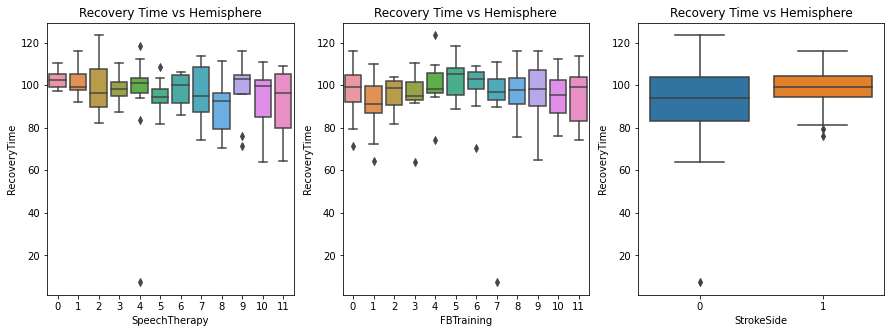

In [38]:
#Step 3: Visualization

# Plot recovery time against each continuous predictor
plt.figure(figsize=(15, 5))
plt.subplot(1,3,1)
sns.boxplot(x="SpeechTherapy", y="RecoveryTime", data=df_stroke)
plt.title("Recovery Time vs Hemisphere")

plt.subplot(1,3,2)
sns.boxplot(x="FBTraining", y="RecoveryTime", data=df_stroke)
plt.title("Recovery Time vs Hemisphere")

plt.subplot(1,3,3)
sns.boxplot(x="StrokeSide", y="RecoveryTime", data=df_stroke)
plt.title("Recovery Time vs Hemisphere")

plt.show()


In [39]:
#Step 4: preparing the dataset

# Apply the outlier removal function to erecovery time column, as the other columns did not show any outlier in the box plots
outliers = outlier_removal(df_stroke, 'RecoveryTime')
#remove the indexes which were diagnosed as outliers
df_stroke_no_outliers = df_stroke.drop(outliers.index) 
print('Detected outliers:')
outliers

Detected outliers:


,Unnamed: 0,RecoveryTime,SpeechTherapy,FBTraining,StrokeSide
4,4,7.295989,4,7,0
14,14,63.654907,10,3,0
30,30,64.685423,10,9,0
41,41,64.445947,11,1,0


In [40]:
#Step 5: check the correlation between I.V.s
df_stroke_no_outliers.corr()

,Unnamed: 0,RecoveryTime,SpeechTherapy,FBTraining,StrokeSide
Unnamed: 0,1.000000,-0.058878,0.008358,0.154889,0.075706
RecoveryTime,-0.058878,1.000000,-0.214878,0.006181,0.202935
SpeechTherapy,0.008358,-0.214878,1.000000,-0.017101,0.248629
FBTraining,0.154889,0.006181,-0.017101,1.000000,0.018403
StrokeSide,0.075706,0.202935,0.248629,0.018403,1.000000


<span style='color:Blue'> as we can see, there is a small correlation between SpeechTherapy and StrokeSide. Moreover, they both have similar correlation with RecoveryTime (in a negative and posetive direction, respectively).

#### Analyses

In [41]:
#Step 6: preparing the data for regression analysis
X = df_stroke_no_outliers[['SpeechTherapy', 'FBTraining', 'StrokeSide']]
y = df_stroke_no_outliers['RecoveryTime']
X = sm.add_constant(X)  # Add an intercept

# Initialize an empty DataFrame to save results
results_table = pd.DataFrame(columns=["Model", "R2", "R2 Adjusted", "Log-Likelihood", "AIC", "BIC"])

<span style='color:Blue'> based on the correlations between parameters, I will check for different types of models:

<span style='color:Blue'>    Model 1: with Speech Therapy 

<span style='color:Blue'>    Model 2: with StrokeSide

<span style='color:Blue'>    Model 3: with all predictors
    
<span style='color:Blue'>    Model 4: with interaction term (between SpeechTherapy and StrokeSide)

In [42]:
#Step 7, Model1: Fit a linear regression model with Speech Therapy
lm_speech = ols('RecoveryTime ~ SpeechTherapy', df_stroke).fit()  # patsy language
print(lm_speech.summary())

# Save in a table for later comparison between models
results_table = results_table.append({
    "Model": 'Model 1: with Speech Therapy',
    "R2": lm_speech.rsquared,
    "R2 Adjusted": lm_speech.rsquared_adj,
    "Log-Likelihood": lm_speech.llf,
    "AIC": lm_speech.aic,
    "BIC": lm_speech.bic
}, ignore_index=True)

                            OLS Regression Results                            
Dep. Variable:           RecoveryTime   R-squared:                       0.044
Model:                            OLS   Adj. R-squared:                  0.036
Method:                 Least Squares   F-statistic:                     5.440
Date:                Mon, 02 Dec 2024   Prob (F-statistic):             0.0214
Time:                        21:52:21   Log-Likelihood:                -487.28
No. Observations:                 120   AIC:                             978.6
Df Residuals:                     118   BIC:                             984.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       100.7840      2.475     40.716

<ipython-input-42-23568f64ea3f>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_table = results_table.append({


In [43]:
#Step 7, Model2: Fit a linear regression model with StrokeSide
lm_StrokeSide = ols('RecoveryTime ~ StrokeSide', df_stroke).fit()
print(lm_StrokeSide.summary())

# Save in a table for later comparison between models
results_table = results_table.append({
    "Model": 'Model 2: with StrokeSide',
    "R2": lm_StrokeSide.rsquared,
    "R2 Adjusted": lm_StrokeSide.rsquared_adj,
    "Log-Likelihood": lm_StrokeSide.llf,
    "AIC": lm_StrokeSide.aic,
    "BIC": lm_StrokeSide.bic
}, ignore_index=True)

                            OLS Regression Results                            
Dep. Variable:           RecoveryTime   R-squared:                       0.069
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     8.794
Date:                Mon, 02 Dec 2024   Prob (F-statistic):            0.00366
Time:                        21:52:24   Log-Likelihood:                -485.67
No. Observations:                 120   AIC:                             975.3
Df Residuals:                     118   BIC:                             980.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     91.8846      1.850     49.666      0.0

<ipython-input-43-d60758cc2e74>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_table = results_table.append({


In [44]:
#Step 7, Model3: Fit a multiple regression model with all predictors
lm_multiple = ols('RecoveryTime ~ SpeechTherapy + FBTraining + StrokeSide', df_stroke).fit()
print(lm_multiple.summary())

# Save in a table for later comparison between models
results_table = results_table.append({
    "Model": 'Model 3: with all predictors',
    "R2": lm_multiple.rsquared,
    "R2 Adjusted": lm_multiple.rsquared_adj,
    "Log-Likelihood": lm_multiple.llf,
    "AIC": lm_multiple.aic,
    "BIC": lm_multiple.bic
}, ignore_index=True)

                            OLS Regression Results                            
Dep. Variable:           RecoveryTime   R-squared:                       0.142
Model:                            OLS   Adj. R-squared:                  0.120
Method:                 Least Squares   F-statistic:                     6.423
Date:                Mon, 02 Dec 2024   Prob (F-statistic):           0.000461
Time:                        21:52:27   Log-Likelihood:                -480.77
No. Observations:                 120   AIC:                             969.5
Df Residuals:                     116   BIC:                             980.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        97.9285      3.086     31.733

<ipython-input-44-f89d3b4c89c1>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_table = results_table.append({


In [45]:
#Step 7, Model4: Fit an interaction model
lm_interaction = ols('RecoveryTime ~ SpeechTherapy + FBTraining + StrokeSide + SpeechTherapy:StrokeSide', df_stroke).fit()
print(lm_interaction.summary())

# Save in a table for later comparison between models
results_table = results_table.append({
    "Model": 'Model 4: with interaction term',
    "R2": lm_interaction.rsquared,
    "R2 Adjusted": lm_interaction.rsquared_adj,
    "Log-Likelihood": lm_interaction.llf,
    "AIC": lm_interaction.aic,
    "BIC": lm_interaction.bic
}, ignore_index=True)

                            OLS Regression Results                            
Dep. Variable:           RecoveryTime   R-squared:                       0.306
Model:                            OLS   Adj. R-squared:                  0.281
Method:                 Least Squares   F-statistic:                     12.65
Date:                Mon, 02 Dec 2024   Prob (F-statistic):           1.45e-08
Time:                        21:52:30   Log-Likelihood:                -468.10
No. Observations:                 120   AIC:                             946.2
Df Residuals:                     115   BIC:                             960.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

<ipython-input-45-48b54daeb284>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_table = results_table.append({


#### Interpretation and Conclusion

In [46]:
results_table

,Model,R2,R2 Adjusted,Log-Likelihood,AIC,BIC
0,Model 1: with Speech Therapy,0.044072,0.035971,-487.281124,978.562248,984.137231
1,Model 2: with StrokeSide,0.069358,0.061471,-485.672657,975.345314,980.920298
2,Model 3: with all predictors,0.142448,0.120270,-480.765113,969.530226,980.680193
3,Model 4: with interaction term,0.305617,0.281464,-468.101616,946.203232,960.140691


<span style='color:Blue'> Best Model:
    
    Model 4 (with interaction term) is the most statistically sound model. It explains the most variance in stroke recovery time and performs best according to all metrics (R², Adjusted R², Log-Likelihood, AIC, and BIC).

<span style='color:Blue'> Worst Model: 
    
    Model 1 (Speech Therapy only) is the least effective model, as it has the lowest values across all evaluation metrics, showing that it explains very little of the variation in stroke recovery time.

<span style='color:Blue'> Thus, Model 4 should be considered the best model for predicting stroke recovery time, with significant contributions from both the therapies and their interactions with stroke side.

### Q4: Simulation: What is the most powerful way to manipulate a dosage?

We have learned how to pick the most appropriate statistical test as a function of how the independent variable is grouped or manipulated (nominal groups or continuous). But in many studies there are several equally feasible ways you could manipulate an independent variable, and you would want to choose the way that will have the highest statistical power. For example, when examining the impact of a drug or an intervention on a health outcome, we usually have freedom to choose how we manipulate the AMOUNT of the drug/intervention. Assuming there is some maximum amount we can administer, we can, for example, divide our population into two extreme groups (full amount Vs none), divide into >2 groups with a series of increasing amounts, or administer random amounts to people up to the maximum. Which is best?

In this problem you are going to use simulations to answer the specific question, which of 4 alternative experimental designs is the most powerful to detect a significant effect, in two hypothetical scenarios where you know the true underlying relationship between the amount of the drug/intervention and the health outcome.

Let's use this specific example: there is a brain stimulation therapy for Parkinsons Disease (PD) patients, and the maximum current allowed to be administered is 2 mA. We have access to 60 Parkinsons patients and we are free to group/manipulate the strength of the current in any way we wish, as long as we don't exceed that maximum. The dependent variable is a motor assessment scale (a trained clinician's evaluation) that has a mean value of 100 in PD patients but has higher values as functioning improves.  

The different experimental designs you are considering are the following:
###### Design 1: 
Split the 60 patients randomly into two groups of 30, one group not undergoing the therapy at all, and the other undergoing the full 2 mA. Run an independent-samples t-test to compare the two groups.
###### Design 2: 
Split the 60 patients randomly into FIVE groups of 12, and assign to the individuals in these 5 groups a current of 0, 0.5, 1, 1.5 and 2 mA. Run an independent-samples one-way ANOVA to compare the five groups (no need to follow up with pairwise comparisons for our current purposes).
###### Design 3: 
Collect the 5 groups of 10 exactly as in Design 2, but instead of an ANOVA, run a linear regression of motor assessment score against current magnitude to test for a significant effect.
###### Design 4: 
Take the 60 patients as one group and randomly assign a current between 0 (none) and 2 mA to each individual, according to a uniform distribution. Run a linear regression of motor assessment score against current magnitude to test for a significant effect.
_________________________________
The simulated data must mimic real data in that when no amount of the therapy is given, the average motor assessment (MA) score should equal 100, and two different scenarios should be examined, which assume different ways in which the therapy has an impact on average:
###### Scenario A: 
The therapy increases MA score linearly from 100 for no therapy to 110 for 2 mA of current. This is described by
\begin{equation}
Y = \beta_0 + \beta_{1A}X
\end{equation}
where Y is MA score, X is the current magnitude, the intercept $\beta_0$=100, and slope $\beta_{1A}$=5 (per mA).

###### Scenario B:  
The therapy increases MA score up to a maximum of 110 for an intermediate current but its impact wanes for greater durations, as described by
\begin{equation}
Y = \beta_0 + \beta_{1B}X + \beta_{2B}X^2
\end{equation}
where the intercept is the same $\beta_0$ = 100, and $\beta_{1B}$ = 21 and $\beta_{2B}$ = -9.72.
________________________________________________
First look at these functions relating the average MA score as a function of stimulation current.

Then simulate real data by assuming that on top of those trends governing mean MA score, there is inter-individual variability in MA score of standard deviation $\sigma$ = 10, independent of the stimulation current. 

Finally, run 1000 simulations of each experimental design for each of the two scenarios (8 in total), re-generating the data afresh using random sampling on each simulation run, and quantify the proportion of runs on which the statistical test for the design correctly concludes that there is in fact a significant effect of the stimulation.

We have provided code below to generate a dataframe to put these results into. Use this table and display it at the end of your simulations.

First plot the underlying functions relating MA score to current from 0 to 2 mA:

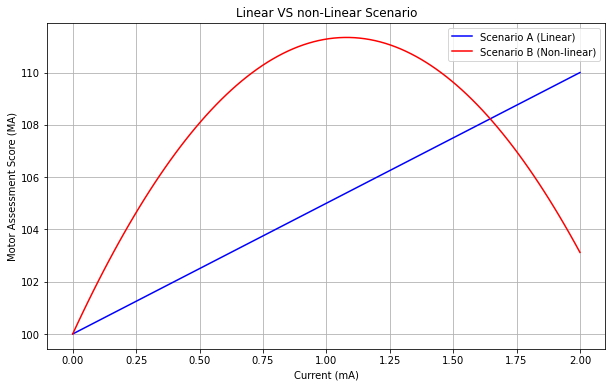

In [48]:
# Define parameters
n_patients = 60
max_current = 2.0
sigma = 10  # Standard deviation for variability
n_simulations = 1000

# Define the current values (0 to 2 mA)
current = np.linspace(0, 2, 100)

# Scenario A: Linear increase
def scenario_A(current):
    return 100 + 5 * current  # Y = 100 + 5 * X

# Scenario B: Non-linear increase
def scenario_B(current):
    return 100 + 21 * current - 9.72 * current**2  # Y = 100 + 21 * X - 9.72 * X^2

# Plot both scenarios
plt.figure(figsize=(10, 6))
plt.plot(current, scenario_A(current), label="Scenario A (Linear)", color="blue")
plt.plot(current, scenario_B(current), label="Scenario B (Non-linear)", color="red")
plt.title("Linear VS non-Linear Scenario")
plt.xlabel("Current (mA)")
plt.ylabel("Motor Assessment Score (MA)")
plt.legend()
plt.grid(True)
plt.show()


Now generate and visualise one example dataset for each Scenario and Design by generating 60 subjects' data with the required amount of variability. Note that only 6 plots are required here for Designs 1, 2 and 4 under both scenarios, because Design 3 collects data in the same way as Design 2. These preliminary steps are important to make sure you have figured out how to generate the data correctly before moving on to the 1000 simulation runs of each. 

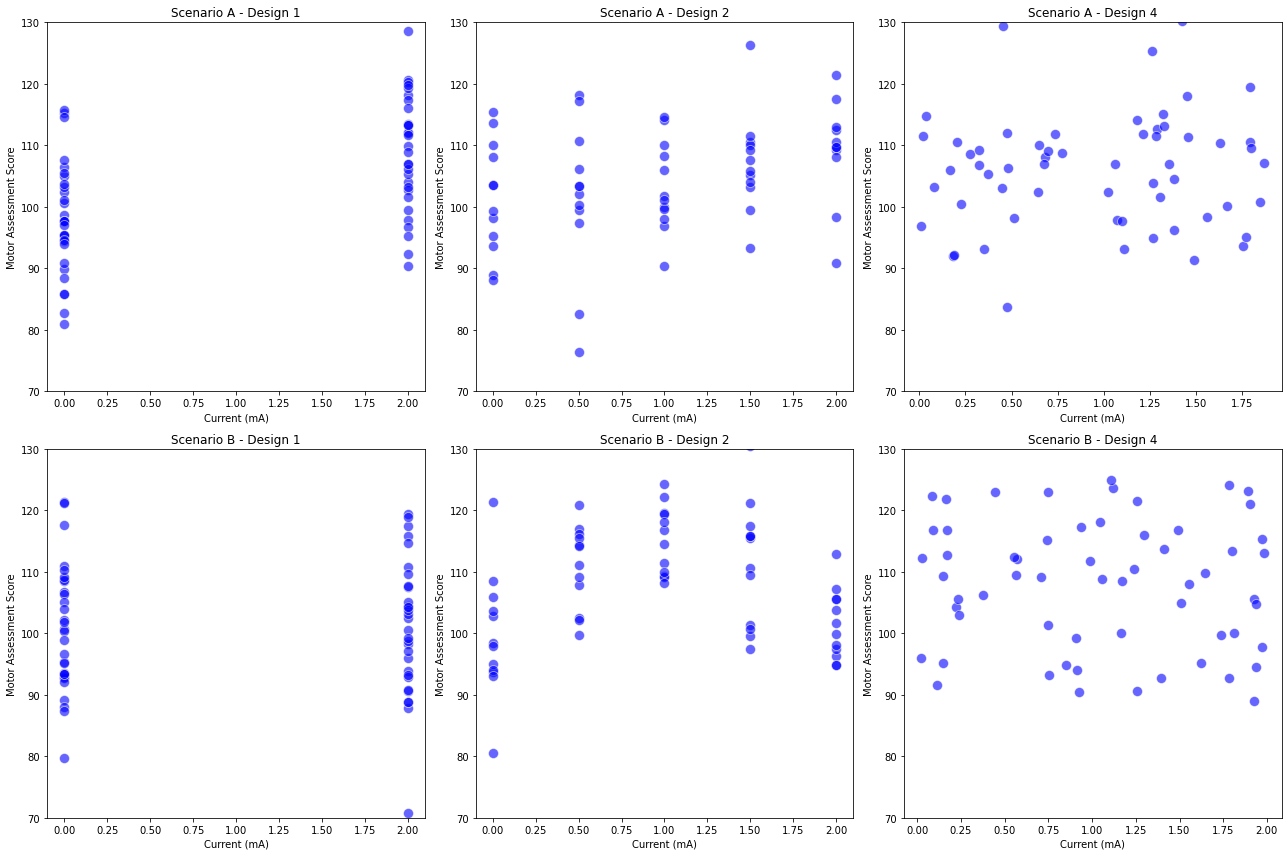

In [50]:
# Function to generate data for each design and scenario
np.random.seed(42)  # For reproducibility
def generate_data(scenario_func, design, n_patients=60, std_dev=10):
    
    if design == 1:  # Two groups: 30 patients in 0 mA and 30 patients in 2 mA
        currents = np.array([0] * 30 + [2] * 30)
    elif design == 2:  # Five groups: 12 patients in each group
        currents = np.concatenate([np.repeat(0, 12), np.repeat(0.5, 12),np.repeat(1, 12),np.repeat(1.5, 12), np.repeat(2, 12)])                        
    elif design == 3:  # Same as design 2, but for linear regression
        currents = np.concatenate([np.repeat(0, 12), np.repeat(0.5, 12),np.repeat(1, 12),np.repeat(1.5, 12), np.repeat(2, 12)])
    elif design == 4:  # Random current between 0 and 2 mA
        currents = np.random.uniform(0, 2, size=n_patients)
    
    # Calculate MA scores using the scenario function
    scores = scenario_func(currents) + np.random.normal(0, std_dev, size=n_patients)
    
    return pd.DataFrame({'Current': currents, 'MA_Score': scores})

# Set up the plot
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
design = [1, 2, 4] # for ploting, we dont want to repeat scenario 3, as it is similar to 2
scenarios = [scenario_A, scenario_B]
scenarios_name = ['Scenario A', 'Scenario B']

# Iterate through each scenario and design
for i, (scenario_func, scenario_name) in enumerate(zip(scenarios, scenarios_name)):
    for d in range(1,4):
        
        # Generate data for the current scenario and design
        design_ind = design[d-1]
        data = generate_data(scenario_func, design_ind)
        
        # Plot the data
        ax = axes[i, d-1]
        sns.scatterplot(x='Current', y='MA_Score', data=data, ax=ax, s=100, color='blue', alpha=0.6)
        ax.set_title(f'{scenario_name} - Design {design_ind}')
        ax.set_xlabel('Current (mA)')
        ax.set_ylabel('Motor Assessment Score')
        #ax.set_xlim(-0.05, 2.05)
        ax.set_ylim(70, 130)
        

plt.tight_layout()
plt.show()


Now simulate the 1000 runs for each of the 8 cases and compute the observed statistical power by counting significant results in the usual way. Display the results (power values) in the table at the end.

In [75]:
# Function to simulate and test each design
def run_design_simulations(scenario_func, design, n_simulations=1000, n_patients=60, std_dev=10):
    
    p_values = []     # Store the p-values for each simulation
    avg_p_values = [] # Store average of the p-values
    
    power = []        # Store power results of significan simulations
    avg_power = []    # Store average of the power
    
    for sim in range(n_simulations):
        # Generate data
        data = generate_data(scenario_func, design, n_patients, std_dev)
        
        # Perform statistical test depending on the design
        if design == 1:  # Independent t-test (Design 1)
            group_1 = data[data['Current'] == 0]['MA_Score']  # 0 mA
            group_2 = data[data['Current'] == 2]['MA_Score']  # 2 mA
            result1 = pg.ttest(group_1, group_2)
            p_val = result1['p-val'].values[0]
            
        elif design == 2:  # One-way ANOVA (Design 2)
            result2 = pg.anova(data=data, dv='MA_Score', between='Current')
            p_val = result2['p-unc'].values[0]
        
        elif design == 3:  # Linear Regression (Design 3)
            MA_score = data['MA_Score'] 
            current  = data['Current']
            X = sm.add_constant(current)  # Add constant for intercept
            model = sm.OLS(MA_score, X).fit()
            p_val = model.pvalues[1]  # p-value for the current magnitude effect
        
        elif design == 4:  # Linear Regression with Random Current (Design 4)
            MA_score = data['MA_Score'] 
            current  = data['Current']
            X = sm.add_constant(current)
            model = sm.OLS(MA_score, X).fit()
            p_val = model.pvalues[1]
        
        p_values.append(p_val)
    
    avg_p_values= np.mean(p_values)
    # Calculate the mean power of each
    power = np.mean(np.array(p_values) < 0.05)    
    #avg_power = np.sum(power)/len(p_values)
    
    return avg_p_values, power

In [67]:
n =[1,2,3]
np.sum(n)/len(n)

2.0

In [76]:
# initials the table
initialize = np.zeros(shape=2)
res_pval = pd.DataFrame({'Design 1':initialize , 'Design 2':initialize , 'Design 3':initialize , 'Design 4':initialize} , index=['Scenario A','Scenario B'])
res_power = pd.DataFrame({'Design 1':initialize , 'Design 2':initialize , 'Design 3':initialize , 'Design 4':initialize} , index=['Scenario A','Scenario B'])
 
# Run simulations for each design and scenario
designs = [1, 2, 3, 4]
scenarios = [scenario_A, scenario_B]
scenarios_name = ['Scenario A', 'Scenario B']
p_value_results = []

for scenario, scenario_name in zip(scenarios, scenarios_name):
    for design in designs:
        [p_value_results, power_result] = run_design_simulations(scenario, design)
        # convert the result into table
        res_pval.loc[scenario_name, f'Design {design}'] = p_value_results 
        res_power.loc[scenario_name, f'Design {design}'] = power_result

In [78]:
# average p-valueus of all conditions
res_pval 

,Design 1,Design 2,Design 3,Design 4
Scenario A,0.005359,0.135255,0.059366,0.114306
Scenario B,0.295247,0.062657,0.428098,0.443342


In [77]:
# average power of all conditions
res_power  

,Design 1,Design 2,Design 3,Design 4
Scenario A,0.978,0.507,0.736,0.583
Scenario B,0.239,0.726,0.116,0.097


Comment on the results - how do the designs rank in terms of statistical power in each scenario, and why do you think that is? Why was it important in the first place to consider multiple different scenarios for the potential underlying trends?

#### Scenario A: Design 1 > Design 3 > Design 4 > Design 2
    
<span style='color:Blue'>  Design 1 directly compares the two extreme groups (0 mA and 2 mA), where the difference in means is maximized. This minimizes variability and maximizes the signal-to-noise ratio for detecting the linear trend. On the other side, ANOVA divides the data into multiple groups, diluting the effect size. It is less efficient than linear regression or a focused two-group comparison when the underlying relationship is strictly linear.
    
<span style='color:Blue'> Overall, Linear relationships are best captured by designs that focus on the extremes or use regression, which models continuous trends efficiently. Dividing the data into multiple groups (Design 2) or introducing randomness (Design 4) reduces sensitivity.

#### Scenario B:Design 2 >> Design 1 > Design 3 > Design 4 
    
<span style='color:Blue'> With five groups, ANOVA is better able to detect differences across the range of current values, capturing the peak of the quadratic trend around 1 mA. Also, in design 1, comparing 0 mA and 2 mA captures part of the quadratic relationship (differences at the extremes). However, it misses the intermediate peak at 1 mA, limiting its power. For design 3 and , Linear regression struggles to model the non-linear trend. Random current levels introduce noise, further reducing sensitivity.
    
<span style='color:Blue'>  Oveall, Non-linear trends require designs that capture differences across the entire range of currents. ANOVA is particularly suited for this purpose because it compares multiple groups. Linear regression performs poorly because it cannot model non-linearity, especially with added noise from random sampling.
    

#### Important to Consider Multiple Scenarios?

<span style='color:Blue'>  1. **Realistic Variability:** In real-world applications, the relationship between a variable (e.g., current) and an outcome (e.g., motor assessment score) is not always linear. Testing multiple scenarios ensures that the study design is robust to different potential trends.

<span style='color:Blue'>  2. **Design Flexibility:** Each design has strengths and weaknesses depending on the nature of the effect. For example, Design 1 excels in linear scenarios but is less effective for non-linear trends. Considering multiple scenarios helps identify which design is most appropriate.

<span style='color:Blue'>  3. **Generalizability of Findings:** By testing both linear (Scenario A) and non-linear (Scenario B) relationships, we can look for different trends, avoids overfitting the design to a single type of trend.

What alternative analysis would make design 4 more powerful for Scenario 2? 
(It is not necessary to simulate this one, but bonus marks that compensate for any lost marks in the above will be awarded if you attempt it)

<span style='color:Blue'>  Design 4 suffers from a mismatch between the analysis method (linear regression) and the underlying pattern (non-linear). Adopting polynomial regression ensures the analysis reflects the true relationship, reducing Type II errors and boosting power.

<span style='color:Blue'>